In [40]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')

In [41]:
path = '../../../../KU/Bachelor+Research/Data/Axetris/Own setup/'

In [42]:
def read_data(path):
    files = os.listdir(path)
    data_dict = {}

    for file in files:
        if 'Leak_test' in file:
            name = file.split('.')[0]
            with open(os.path.join(path, file)) as f:
                df = pd.read_csv(f, sep = '\t')
                # df['Seconds'] = df['Seconds'] - df['Seconds'][0]
                # df = df.dropna()

            data_dict[name] = df
    return data_dict

In [43]:
leak_test = read_data(path)

display(leak_test)

{'Leak_test1_05032024':           Seconds    CH4 [ppm]
 0     4324.415934     0.000000
 1     4324.891036    -0.280000
 2     4325.382496    -0.200000
 3     4325.886007     0.000000
 4     4326.358267    -0.030000
 ...           ...          ...
 7930  8200.940476  9293.589844
 7931  8201.411284  9194.519531
 7932  8201.912259  9110.649414
 7933  8202.385701  9009.490234
 7934  8202.878257  8932.040039
 
 [7935 rows x 2 columns],
 'Leak_test2_05032024':           Seconds    CH4 [ppm]
 0        9.604650  4339.679688
 1       10.099681  3959.339844
 2       10.590488  3924.020020
 3       11.063991  3878.289795
 4       11.554741  3847.409912
 ...           ...          ...
 3202  1574.788744  2005.359985
 3203  1575.275112  2006.069946
 3204  1575.759893  2000.359985
 3205  1576.260608  2005.179932
 3206  1576.729443  2002.919922
 
 [3207 rows x 2 columns]}

In [44]:
def overview_plot_leak(ax, df):
    ax.plot(df['Seconds'], df['CH4 [ppm]'], lw = 1)
    
    ax.set(xlabel = 'Time / s', ylabel = 'CH4 concentration / ppm')
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.yaxis.offsetText.set_fontsize(9)

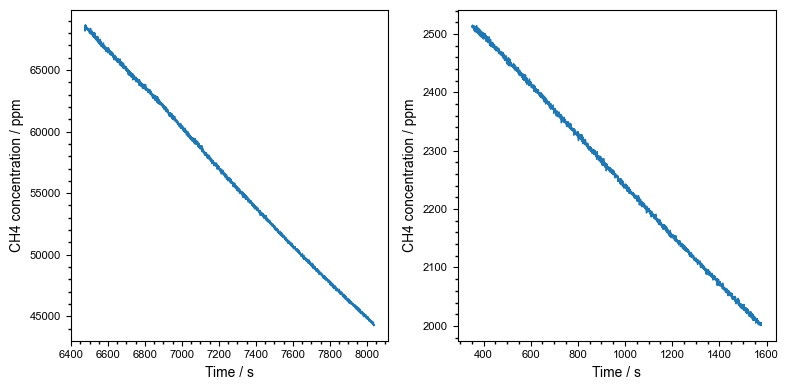

In [45]:
fig, ax = plt.subplots(1,2, figsize = (8, 4))

overview_plot_leak(ax[0], leak_test['Leak_test1_05032024'][4400:7600])
overview_plot_leak(ax[1], leak_test['Leak_test2_05032024'][700:])

fig.tight_layout()
fig.savefig('leak_test.png', dpi = 600)
plt.show()